In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# **Importing Libraries**
---


In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
import imghdr
import numpy as np
import os

C:\Users\siddh\AppData\Local\Temp\ipykernel_6868\3686139136.py:8: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


# **Removing unwanted image**

---



In [3]:
data_dir = 'data3'

In [4]:
for image_class in os.listdir(data_dir):
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        pass
#         print(image)
print("_______________________________")
real_len = len(os.listdir(os.path.join(data_dir,'real')))
print("Real images: "+str(real_len))
fake_len = len(os.listdir(os.path.join(data_dir,'fake')))
print("Fake images: "+str(fake_len))
edited_len = len(os.listdir(os.path.join(data_dir,'edited')))
print("Edited images: "+str(edited_len))
print("_______________________________")
print("Total images: "+str(real_len+fake_len+edited_len))
# os.listdir(os.path.join(data_dir,'real')) #print all image from real set

edited
fake
real
_______________________________
Real images: 240
Fake images: 249
Edited images: 190
_______________________________
Total images: 679


In [5]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [6]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            os.remove(image_path)

# **Data loading**

---



In [7]:
tf.keras.utils.image_dataset_from_directory??

In [8]:
data = tf.keras.utils.image_dataset_from_directory('data1')

Found 756 files belonging to 3 classes.


In [9]:
data_iterator = data.as_numpy_iterator()

In [10]:
# Run again to get another batch from the iterator
batch = data_iterator.next()

In [11]:
batch[1]

array([1, 2, 1, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 2, 0, 2, 1, 0, 2, 2, 2, 2,
       2, 0, 0, 0, 1, 1, 0, 1, 0, 1])

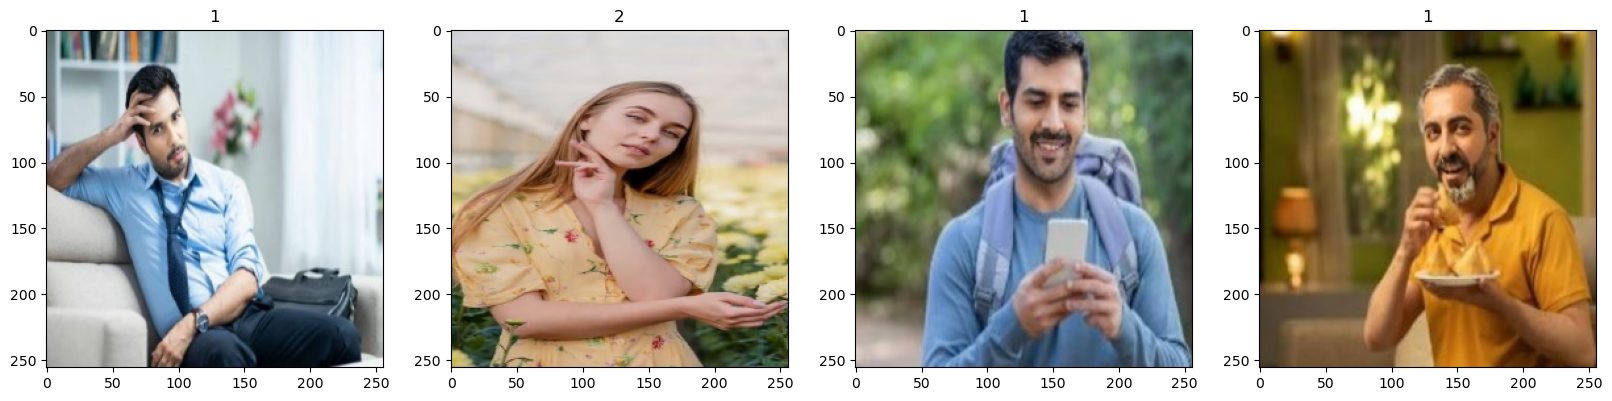

In [12]:
#real = 2
#fake = 1
#edited = 0
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
# Define your model
def create_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [14]:

# Set your image dimensions and the number of classes
img_width, img_height = 150, 150
input_shape = (img_width, img_height, 3)
num_classes = 3  # Replace with the number of your classes

# Create the model
model = create_model(input_shape, num_classes)

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Use data augmentation for better generalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2)  # Add validation split

In [15]:
# Adjust the path to your dataset
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='training')  # Use training split

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='categorical',
    subset='validation')  # Use validation split

Found 544 images belonging to 3 classes.
Found 135 images belonging to 3 classes.


# **Traning**

---


In [16]:
# Train the model and collect the training history with validation data
history = model.fit(train_generator, epochs=20, validation_data=validation_generator)


Epoch 1/20


17/17 [==============================] - 23s 1s/step - loss: 1.2214 - accuracy: 0.3401 - val_loss: 1.1002 - val_accuracy: 0.3630
Epoch 2/20
17/17 [==============================] - 17s 993ms/step - loss: 1.0876 - accuracy: 0.3676 - val_loss: 1.0712 - val_accuracy: 0.3630
Epoch 3/20
17/17 [==============================] - 19s 1s/step - loss: 1.0780 - accuracy: 0.3860 - val_loss: 0.9947 - val_accuracy: 0.5111
Epoch 4/20
17/17 [==============================] - 18s 1s/step - loss: 1.0599 - accuracy: 0.4191 - val_loss: 0.9627 - val_accuracy: 0.4963
Epoch 5/20
17/17 [==============================] - 15s 907ms/step - loss: 1.0644 - accuracy: 0.4062 - val_loss: 1.0479 - val_accuracy: 0.4148
Epoch 6/20
17/17 [==============================] - 16s 931ms/step - loss: 1.0501 - accuracy: 0.4283 - val_loss: 0.9749 - val_accuracy: 0.4148
Epoch 7/20
17/17 [==============================] - 17s 994ms/step - loss: 1.0284 - accuracy: 0.4301 - val_loss: 0.8992 - val_accuracy: 0.5259
Epoch 

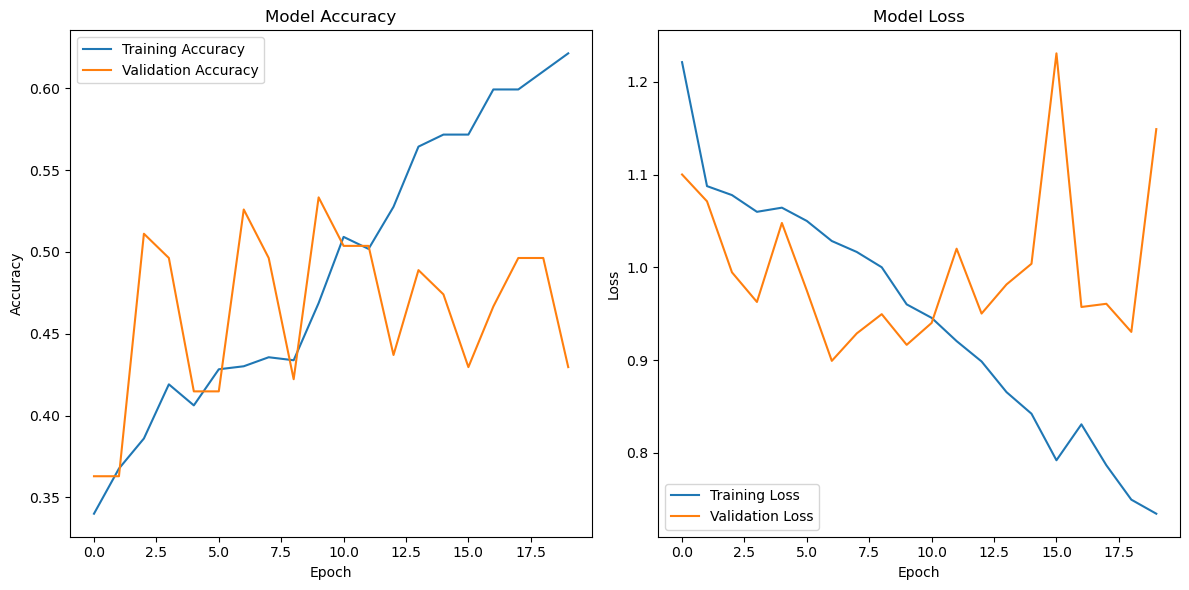

C:\app\anaconda\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:

# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Save the model for future use
model.save('image_classifier_model.h5')


In [18]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model
model = load_model('image_classifier_model.h5')

# Load and preprocess the new image you want to classify
img_path = 'C:/Users/siddh/Downloads/fake_image_detection/fake_image_detection/data/real/real_00003.jpg'  # Replace with the path to your image
img = image.load_img(img_path, target_size=(img_width, img_height))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Make predictions
predictions = model.predict(img_array)

# Get the class index with the highest probability
predicted_class = np.argmax(predictions)

# Print the predicted class
print(f'The predicted class is: {predicted_class}')
if predicted_class == 0:
    print("Edited Image")
elif predicted_class == 1:
    print("Fake")
elif predicted_class == 2:
    print("Real")



1/1 [==============================] - 0s 173ms/step
The predicted class is: 2
Real


# User Interface

In [ ]:
import tkinter as tk
from tkinter import filedialog
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
import os
import numpy as np
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
from PIL import Image, ImageTk
import shutil

# Load the trained model
model = load_model('image_classifier_model.h5')

# Set the image dimensions
img_width, img_height = 150, 150

#global variable
img_path=""

def classify_image(img_path):
    # Display the name of the selected image
    image_name = os.path.basename(img_path)
    path_label.config(text=f'Selected Image: {image_name}')

    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize the image

    # Make predictions
    predictions = model.predict(img_array)

    # Get the class index with the highest probability
    predicted_class = np.argmax(predictions)

    # Display the predicted class
    result_label.config(text=f'The predicted class is: {predicted_class}')

    # Map the predicted class to labels
    class_labels = {0: 'real', 1: 'fake', 2: 'edited'}
    predicted_label = class_labels.get(predicted_class, 'Unknown')

    # Update the result label
    result_label.config(text=f'The detected image is {predicted_label}')

    # Change the location to the desired folder
    save_folder = os.path.join("classified_images", predicted_label.lower())
    os.makedirs(save_folder, exist_ok=True)
    save_path = os.path.join(save_folder, image_name)
    shutil.copy(img_path, save_path)



    # Create a Pie Chart
    classes = ['Real', 'Fake', 'Edited']
    probabilities = predictions[0]

    # Clear previous Pie Chart
    for widget in chart_frame.winfo_children():
        widget.destroy()

    fig, ax = plt.subplots(figsize=(7, 7))
    ax.pie(probabilities, labels=classes, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 7})
    canvas = FigureCanvasTkAgg(fig, master=chart_frame)
    canvas.draw()
    canvas.get_tk_widget().config(bg='#d9d9d9')  # Set the background color of the Tkinter canvas
    canvas.get_tk_widget().config(width=151, height=151)
    canvas.get_tk_widget().grid(row=0, column=0, padx=10, pady=10, sticky=tk.W)

    # Enable the Start button
    start_button.config(state=tk.NORMAL)

# Function to select an image using file dialog
def select_image():
    global img_path 
    img_path = filedialog.askopenfilename(title="Select Image", filetypes=[("Image files", "*.png *.jpg *.jpeg")])
    if img_path:
            # Display the image next to the Pie Chart
        img = Image.open(img_path)
        img = img.resize((150, 150))  # Resize the image
        img_tk = ImageTk.PhotoImage(img)
        img_label.config(image=img_tk)
        img_label.image = img_tk
    
#         image_name = os.path.basename(img_path)
        path_label.config(text=f'Selected Image: {os.path.basename(img_path)}')
        # Enable the Start button when a new image is selected
        start_button.config(state=tk.NORMAL)
    else:
        path_label.config(text='Not selected')
        # Disable the Start button if no image is selected
        start_button.config(state=tk.DISABLED)    
    
    
# Function to start prediction
def start_prediction():
    # Get the path of the selected image
#     img_path = path_label.cget("text").replace('Selected Image: ', '')
    global img_path
    if img_path:
        print("1")
        print(img_path)
        classify_image(img_path)

        # Disable the Start button after prediction
        start_button.config(state=tk.DISABLED)





# Create the main Tkinter window
root = tk.Tk()
root.title("Expose Fake Images")
# Change the icon of the Tkinter window
root.iconbitmap("eye.ico")  
root.geometry("560x400")  # Adjusted width for better visibility

# Frame for displaying Pie Chart and Image
chart_frame = tk.Frame(root)
chart_frame.grid(row=0, column=1, padx=20, pady=20, sticky=tk.W)

# Create and set up widgets using grid
path_label = tk.Label(root, text="Selected Image: Not selected")
path_label.grid(row=1, column=0, pady=10, padx=220,  sticky=tk.W, columnspan=2)

select_button = tk.Button(root, text="Select Image", command=select_image)
select_button.grid(row=2, column=0, pady=10, padx=245, sticky=tk.W, columnspan=2)

start_button = tk.Button(root, text="Start", command=start_prediction, state=tk.DISABLED)
start_button.grid(row=3, column=0, pady=10, padx=270, sticky=tk.W, columnspan=2)

# Change the font size of result_label
result_label = tk.Label(root, text="", font=('Helvetica', 14))
result_label.grid(row=4, column=0, pady=10, padx=180,  sticky=tk.W, columnspan=2)

# Label for displaying the selected image
img_label = tk.Label(root)
img_label.grid(row=0, column=0, padx=30)

# Start the Tkinter
root.mainloop()

1
C:/Users/siddh/Downloads/mobile-05 (1).jpg
1/1 [==============================] - 0s 101ms/step
1
C:/Users/siddh/Downloads/image_folder/edited.jpg
1/1 [==============================] - 0s 42ms/step
1
C:/Users/siddh/Downloads/ShahRukh_Khan.jpg
1/1 [==============================] - 0s 42ms/step
